## Biblioteca e import dos dados

In [ ]:
import pandas as pd
import numpy as np
from prophet.plot import plot_cross_validation_metric

In [ ]:
df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp2/datalake/silver/kaggle_covid_filtro_paises/full_grouped_filtro_começo_do_covid.csv')#estou usando um df que foi retirado os dias que antes da primeira contaminação de cada pais

In [ ]:
#df1 = df1.replace("Argentina", "1")
#df1 = df1.replace("Chile", "2")
#df1 = df1.replace("Ecuador", "3")
#df1 = df1.replace("Mexico", "4")
#df1 = df1.replace("Spain", "5")
#df1 = df1.replace("Americas", "1")
#df1 = df1.replace("Europe", "2")
df1 = df1.rename({'Date': 'ds'}, axis = 1)
df1 = df1.rename({'New cases': 'y'}, axis = 1)
display(df1.head(30))
display(df1.tail(30))

,Unnamed: 0,ds,Country/Region,Confirmed,Deaths,Recovered,Active,y,New deaths,New recovered,WHO Region
0,2027,2020-02-01,Spain,1,0,0,1,1,0,0,Europe
1,2214,2020-02-02,Spain,1,0,0,1,0,0,0,Europe
2,2401,2020-02-03,Spain,1,0,0,1,0,0,0,Europe
3,2588,2020-02-04,Spain,1,0,0,1,0,0,0,Europe
4,2775,2020-02-05,Spain,1,0,0,1,0,0,0,Europe
5,2962,2020-02-06,Spain,1,0,0,1,0,0,0,Europe
6,3149,2020-02-07,Spain,1,0,0,1,0,0,0,Europe
7,3336,2020-02-08,Spain,1,0,0,1,0,0,0,Europe
8,3523,2020-02-09,Spain,2,0,0,2,1,0,0,Europe
9,3710,2020-02-10,Spain,2,0,0,2,0,0,0,Europe


,Unnamed: 0,ds,Country/Region,Confirmed,Deaths,Recovered,Active,y,New deaths,New recovered,WHO Region
751,34191,2020-07-22,Spain,267551,28426,150376,88749,1357,2,0,Europe
752,34145,2020-07-22,Mexico,362274,41190,270147,50937,6019,790,2740,Americas
753,34085,2020-07-22,Ecuador,77257,5418,33125,38714,1040,52,400,Americas
754,34040,2020-07-22,Argentina,141900,2588,60531,78781,5782,98,1933,Americas
755,34069,2020-07-22,Chile,336402,8722,309241,18439,1719,45,2425,Americas
756,34378,2020-07-23,Spain,270166,28429,150376,91361,2615,3,0,Europe
757,34332,2020-07-23,Mexico,370712,41908,275454,53350,8438,718,5307,Americas
758,34272,2020-07-23,Ecuador,78148,5439,33455,39254,891,21,330,Americas
759,34227,2020-07-23,Argentina,148027,2702,62815,82510,6127,114,2284,Americas
760,34256,2020-07-23,Chile,338759,8838,311431,18490,2357,116,2190,Americas


## Previsão da Argentina

###Teste com Prophet limpo

In [ ]:
pais=['Argentina']
df_ag = df1[df1['Country/Region'].isin(pais)]
df_ag= df_ag[['ds','y']]


In [ ]:
display(df_ag.head(30))
display(df_ag.tail(30))

,ds,y
49,2020-03-03,1
54,2020-03-04,0
59,2020-03-05,0
64,2020-03-06,1
69,2020-03-07,6
74,2020-03-08,4
79,2020-03-09,0
84,2020-03-10,5
89,2020-03-11,2
94,2020-03-12,0


,ds,y
634,2020-06-28,2189
639,2020-06-29,2335
644,2020-06-30,2262
649,2020-07-01,2667
654,2020-07-02,2744
659,2020-07-03,2845
664,2020-07-04,2590
669,2020-07-05,2439
674,2020-07-06,2632
679,2020-07-07,2979


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/7gjw7zkr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/0g_sm8k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37820', 'data', 'file=/tmp/tmpcm1uu7ie/7gjw7zkr.json', 'init=/tmp/tmpcm1uu7ie/0g_sm8k3.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelhthmrbjx/prophet_model-20221209201703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

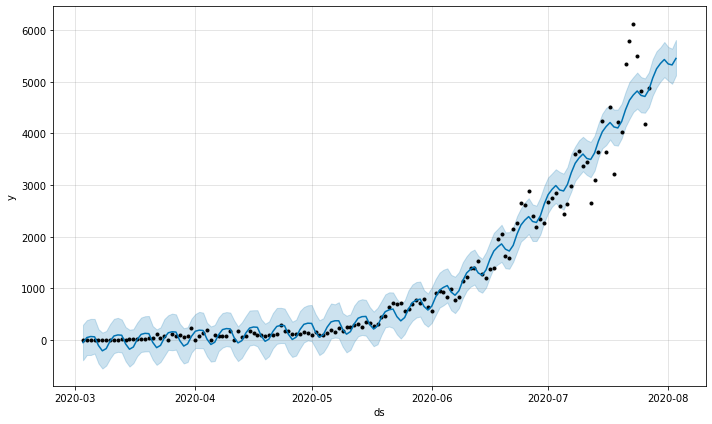

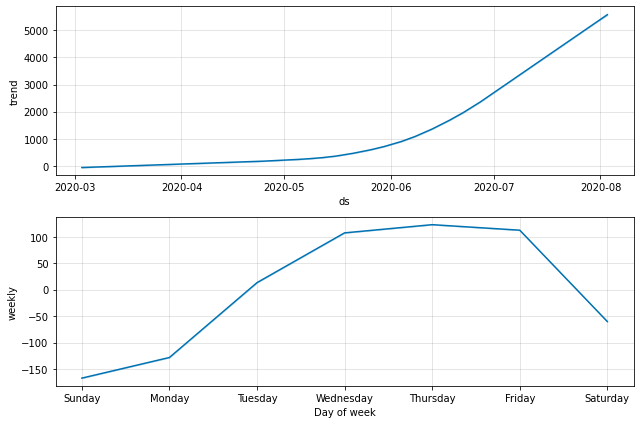

In [ ]:
from prophet import Prophet

m = Prophet()
m.fit(df_ag)
m = Prophet()
m.fit(df_ag)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Busca dos melhores parametros a ser usado no Prophet

In [ ]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}


# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ag)  # Fit model with given params
    df_cv = cross_validation(m,horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/rcq_5gip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/i_tu32vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60476', 'data', 'file=/tmp/tmpcm1uu7ie/rcq_5gip.json', 'init=/tmp/tmpcm1uu7ie/i_tu32vr.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelbzp97iem/prophet_model-20221209201704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
20:17:04 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  1924.327156
1                     0.001                     0.10  1916.457330
2                     0.001                     1.00  1919.043388
3                     0.001                    10.00  1919.026058
4                     0.010                     0.01  1920.152752
5                     0.010                     0.10  1917.240413
6                     0.010                     1.00  1917.875599
7                     0.010                    10.00  1917.473484
8                     0.100                     0.01   792.041739
9                     0.100                     0.10   797.307634
10                    0.100                     1.00   796.331746
11                    0.100                    10.00   793.598394
12                    0.500                     0.01   747.359574
13                    0.500                     0.10   747.829185
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/xk5wdips.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/5vape484.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40289', 'data', 'file=/tmp/tmpcm1uu7ie/xk5wdips.json', 'init=/tmp/tmpcm1uu7ie/5vape484.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_model3h9sclpr/prophet_model-20221209201732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

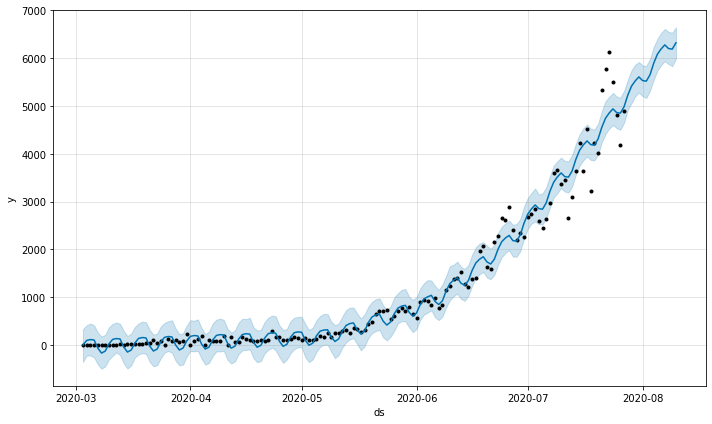

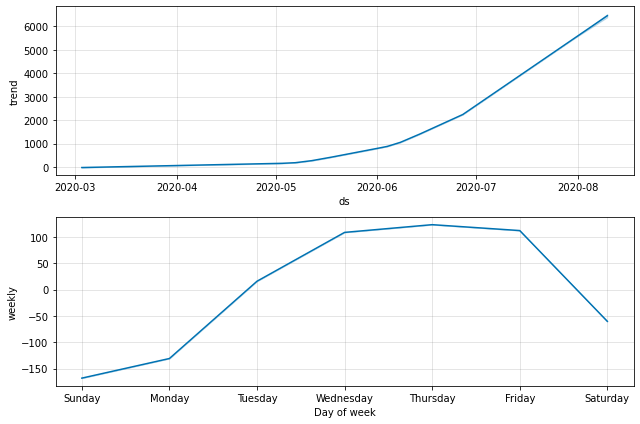

In [ ]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.5).fit(df_ag)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/1xiqe9cp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/5k3j8m8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20198', 'data', 'file=/tmp/tmpcm1uu7ie/1xiqe9cp.json', 'init=/tmp/tmpcm1uu7ie/5k3j8m8b.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelnoodoul3/prophet_model-20221209201734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-19             0 2020-05-10            52






<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

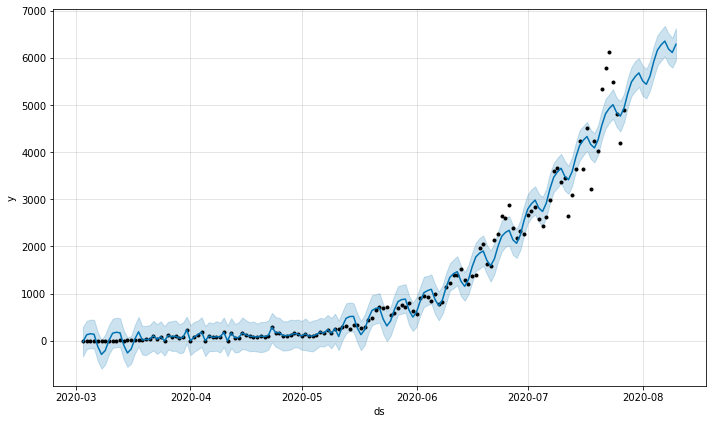

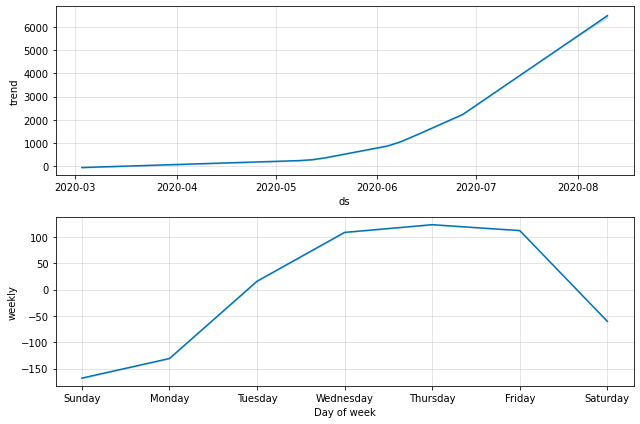

In [ ]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-19', 'lower_window': 0, 'ds_upper': '2020-05-10'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=10.0, changepoint_prior_scale = 0.5)
m2 = m2.fit(df_ag)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show


In [ ]:
#metricas
df_cv = cross_validation(m2,horizon='7 days', parallel="processes")
df_p_ag = performance_metrics(df_cv);


INFO:prophet:Making 34 forecasts with cutoffs between 2020-03-26 12:00:00 and 2020-07-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f55a6273520>
INFO:prophet:n_changepoints greater than number of observations. Using 18.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/nl9g3th6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/trv48svr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/f4osj9gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/5cglsmzb.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93735', 'data', 'file=/tmp/tmpcm1uu7ie/trv48svr.json', 'init=/tmp/tmpcm1uu7ie/f4osj9gs.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modeltfqlsxxz/prophet_model-202

###criação do csv

In [ ]:
#criação do csv
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_agentina.csv")

## Previsão da Spain


###Prophet limpo

In [ ]:
pais=['Spain']
df_sp = df1[df1['Country/Region'].isin(pais)]
df_sp= df_sp[['ds','y']]

m = Prophet()
m.fit(df_sp)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/14rjyxlc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/_ezzxldb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30785', 'data', 'file=/tmp/tmpcm1uu7ie/14rjyxlc.json', 'init=/tmp/tmpcm1uu7ie/_ezzxldb.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelwdcbah2r/prophet_model-20221209202405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

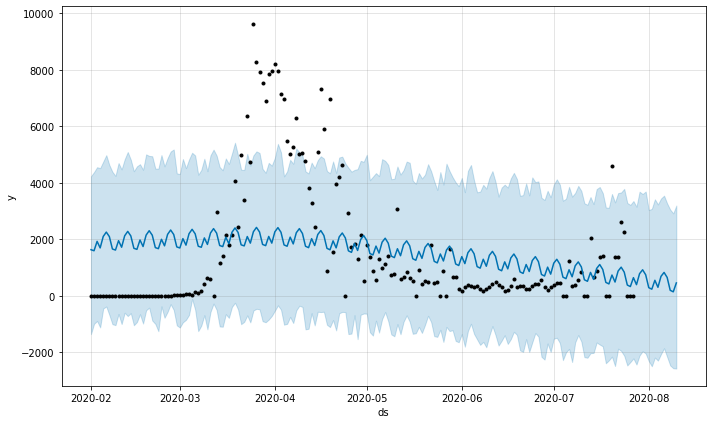

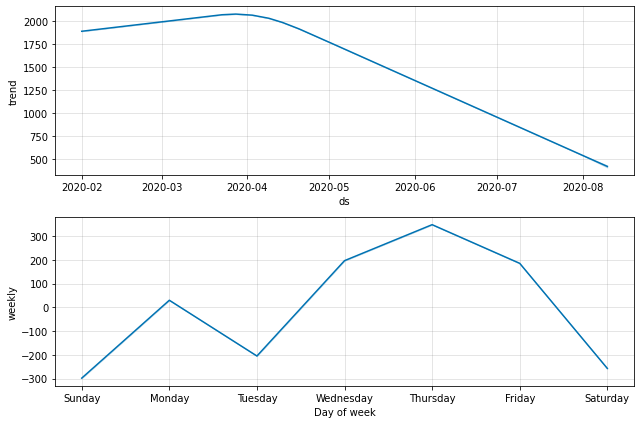

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [ ]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_sp)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/v709r3nt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/8_nhc_xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63807', 'data', 'file=/tmp/tmpcm1uu7ie/v709r3nt.json', 'init=/tmp/tmpcm1uu7ie/8_nhc_xc.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelljw215xo/prophet_model-20221209202407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
20:24:07 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3027.894993
1                     0.001                     0.10  2840.835261
2                     0.001                     1.00  2888.548249
3                     0.001                    10.00  2876.336229
4                     0.010                     0.01  3127.264849
5                     0.010                     0.10  3103.876495
6                     0.010                     1.00  3086.735911
7                     0.010                    10.00  3110.582314
8                     0.100                     0.01  2185.870434
9                     0.100                     0.10  2260.954190
10                    0.100                     1.00  2266.359869
11                    0.100                    10.00  2283.224827
12                    0.500                     0.01  1524.178571
13                    0.500                     0.10  1599.918513
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/vfva2yzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/m0ths01f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86938', 'data', 'file=/tmp/tmpcm1uu7ie/vfva2yzm.json', 'init=/tmp/tmpcm1uu7ie/m0ths01f.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelk1mqcnn6/prophet_model-20221209202452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

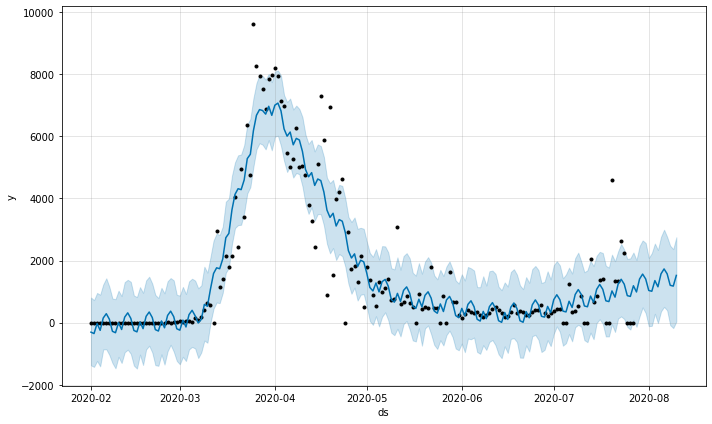

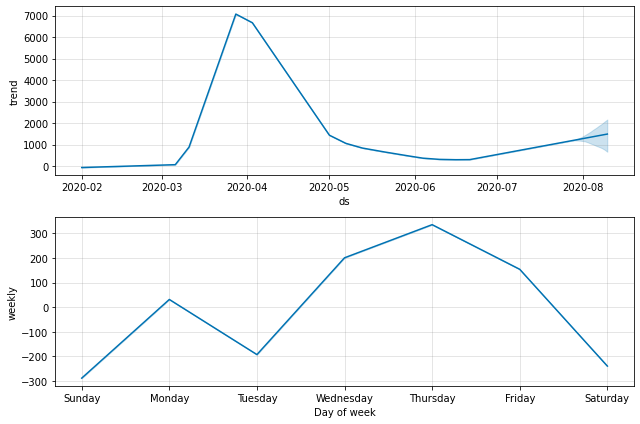

In [ ]:
m = Prophet(seasonality_prior_scale=1.0, changepoint_prior_scale = 0.5).fit(df_sp)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/6i1u7tfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/elu6mw21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58345', 'data', 'file=/tmp/tmpcm1uu7ie/6i1u7tfz.json', 'init=/tmp/tmpcm1uu7ie/elu6mw21.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modeljkq19_fy/prophet_model-20221209202453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:53 - cmdstanpy - INFO - Chain [1] start processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-14             0 2020-05-09            56




INFO:cmdstanpy:Chain [1] start processing
20:24:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

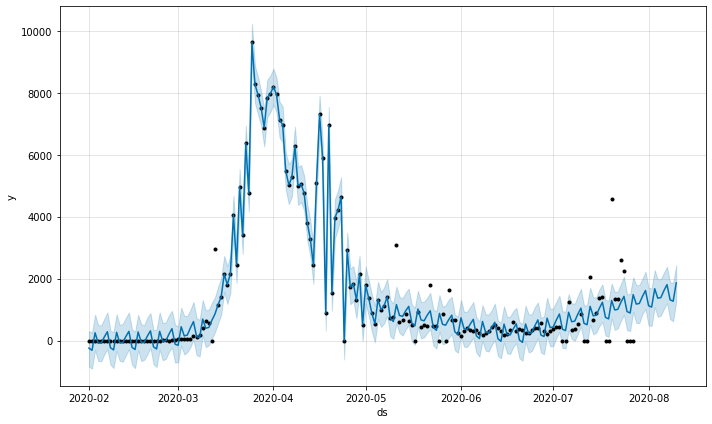

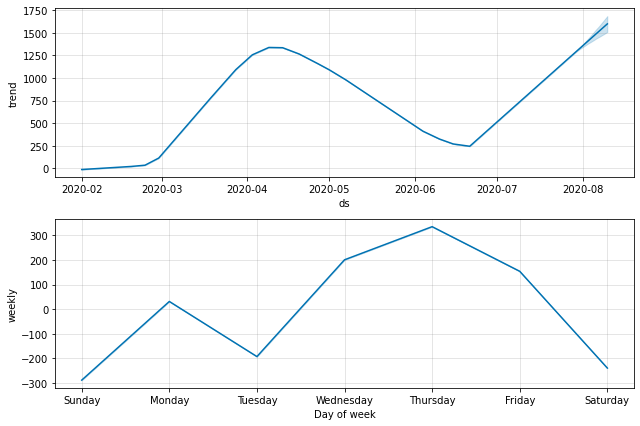

In [ ]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-14', 'lower_window': 0, 'ds_upper': '2020-05-09'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=1.0, changepoint_prior_scale = 0.5)
m2 = m2.fit(df_sp)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show


In [ ]:
#metricas
df_cv = cross_validation(m2,horizon='7 days', parallel="processes")
df_p_sp = performance_metrics(df_cv);


INFO:prophet:Making 43 forecasts with cutoffs between 2020-02-24 00:00:00 and 2020-07-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f55b1cb7910>
INFO:prophet:n_changepoints greater than number of observations. Using 18.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/d8ys77om.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/rdr16jon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/4zzijipf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89160', 'data', 'file=/tmp/tmpcm1uu7ie/d8ys77om.json', 'init=/tmp/tmpcm1uu7ie/4zzijipf.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_models4dtm166/prophet_model-20221209202455.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:24:55 - cmd

###Criação do CSV

In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_span.csv")

## Previsão da Chile

###Prophet Limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/ftjgmtml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/a72ors24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82812', 'data', 'file=/tmp/tmpcm1uu7ie/ftjgmtml.json', 'init=/tmp/tmpcm1uu7ie/a72ors24.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_model48lisy21/prophet_model-20221209202555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

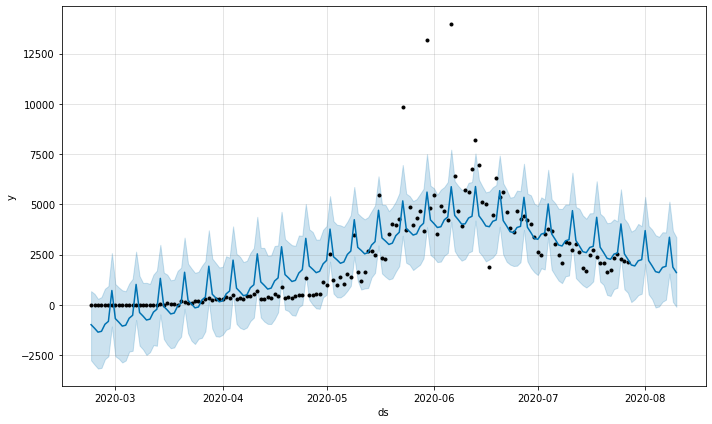

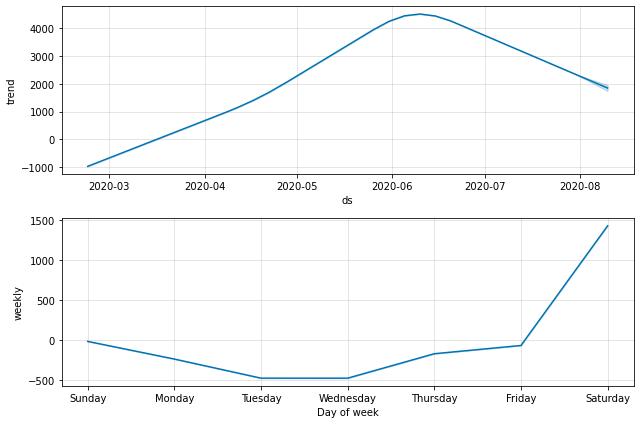

In [ ]:
pais=['Chile']
df_ch = df1[df1['Country/Region'].isin(pais)]
df_ch= df_ch[['ds','y']]

m = Prophet()
m.fit(df_ch)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show


###Busca dos melhores parametros


In [ ]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ch)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/di1mln14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/gq0qwm3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85333', 'data', 'file=/tmp/tmpcm1uu7ie/di1mln14.json', 'init=/tmp/tmpcm1uu7ie/gq0qwm3i.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modely174hv3s/prophet_model-20221209202556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
20:25:56 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3294.876665
1                     0.001                     0.10  3281.476475
2                     0.001                     1.00  3285.199919
3                     0.001                    10.00  3291.757212
4                     0.010                     0.01  3226.695918
5                     0.010                     0.10  3241.752806
6                     0.010                     1.00  3235.515412
7                     0.010                    10.00  3136.970902
8                     0.100                     0.01  4458.305845
9                     0.100                     0.10  4396.426915
10                    0.100                     1.00  4386.431705
11                    0.100                    10.00  4337.327678
12                    0.500                     0.01  4114.812886
13                    0.500                     0.10  4128.791065
14        

###Utilização dos parametros obtidos 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/_t6j7ehk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/aa6yexkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58687', 'data', 'file=/tmp/tmpcm1uu7ie/_t6j7ehk.json', 'init=/tmp/tmpcm1uu7ie/aa6yexkz.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelx29mdymw/prophet_model-20221209202635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

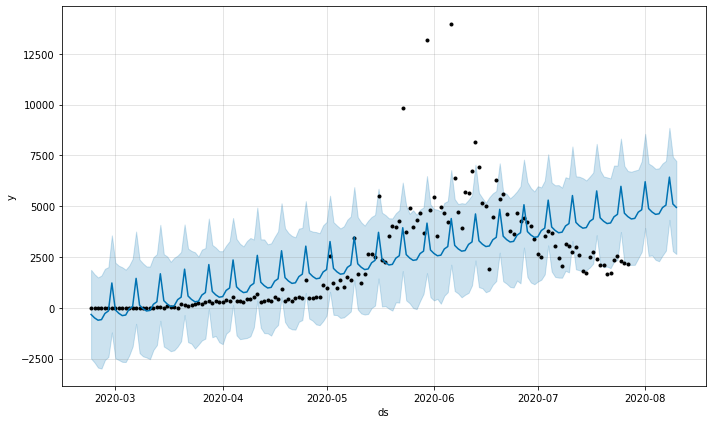

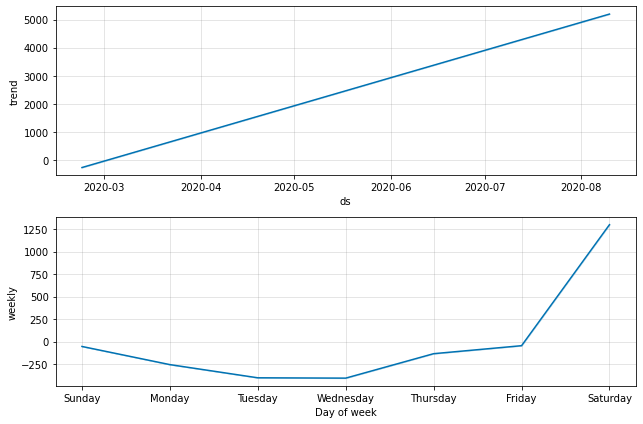

In [ ]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.01).fit(df_ch)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

In [ ]:
#metricas
df_cv = cross_validation(m,horizon='7 days', parallel="processes")
df_p_ch = performance_metrics(df_cv);


INFO:prophet:Making 37 forecasts with cutoffs between 2020-03-16 00:00:00 and 2020-07-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f559ae0f8e0>
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/b4e5uepl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/0t93vm06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/dw7217jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/ppytwe8z.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58269', 'data', 'file=/tmp/tmpcm1uu7ie/b4e5uepl.json', 'init=/tmp/tmpcm1uu7ie/0t93vm06.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelbcq0e07e/prophet_model-202

###criação do csv


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_chile.csv")

## Previsão do Ecuador

###Prophet limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/dxj1f_82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/2i2zj21t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85694', 'data', 'file=/tmp/tmpcm1uu7ie/dxj1f_82.json', 'init=/tmp/tmpcm1uu7ie/2i2zj21t.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelsfz5pzot/prophet_model-20221209202657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

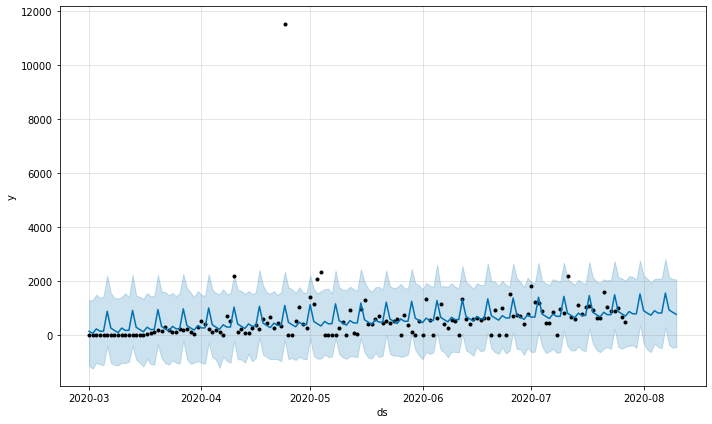

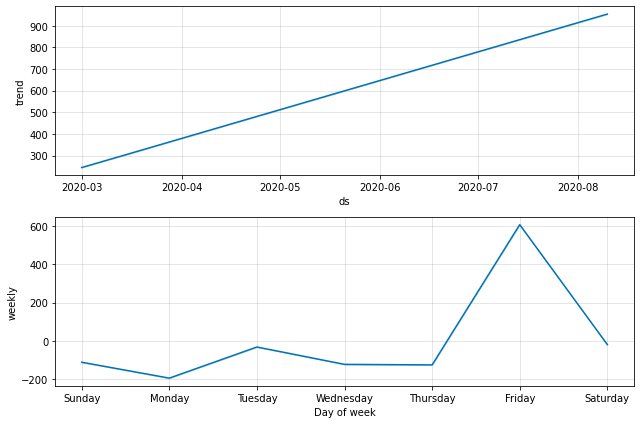

In [ ]:
pais=['Ecuador']
df_ec = df1[df1['Country/Region'].isin(pais)]
df_ec= df_ec[['ds','y']]

m = Prophet()
m.fit(df_ec)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ec)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/fg_35vvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/e54syffv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23107', 'data', 'file=/tmp/tmpcm1uu7ie/fg_35vvj.json', 'init=/tmp/tmpcm1uu7ie/e54syffv.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelet8k4zm7/prophet_model-20221209202658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
20:26:58 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  551.378270
1                     0.001                     0.10  595.573481
2                     0.001                     1.00  590.143559
3                     0.001                    10.00  590.110455
4                     0.010                     0.01  553.648913
5                     0.010                     0.10  628.908555
6                     0.010                     1.00  631.931887
7                     0.010                    10.00  633.035629
8                     0.100                     0.01  547.280584
9                     0.100                     0.10  600.391573
10                    0.100                     1.00  608.961058
11                    0.100                    10.00  600.153578
12                    0.500                     0.01  676.023307
13                    0.500                     0.10  745.971453
14                    0.5

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/hryvpu2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/8w3hbssa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89297', 'data', 'file=/tmp/tmpcm1uu7ie/hryvpu2l.json', 'init=/tmp/tmpcm1uu7ie/8w3hbssa.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelyolxpwe4/prophet_model-20221209202719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

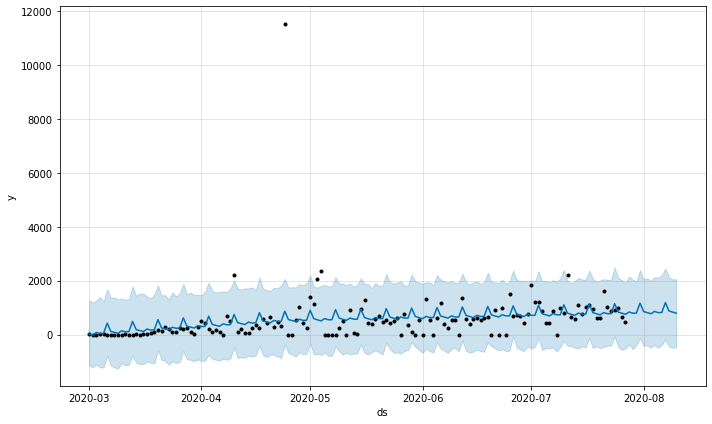

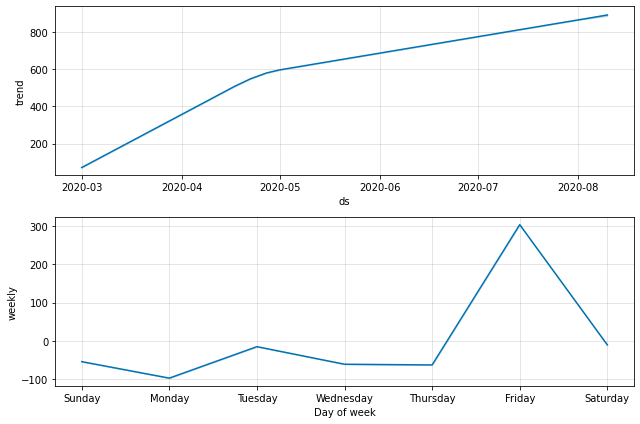

In [ ]:
m = Prophet(seasonality_prior_scale=0.01, changepoint_prior_scale = 0.1).fit(df_ec)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-16             0 2020-03-31            15




DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/95gv92c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/im04d9mr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34757', 'data', 'file=/tmp/tmpcm1uu7ie/95gv92c2.json', 'init=/tmp/tmpcm1uu7ie/im04d9mr.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_model61vj84gl/prophet_model-20221209202721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

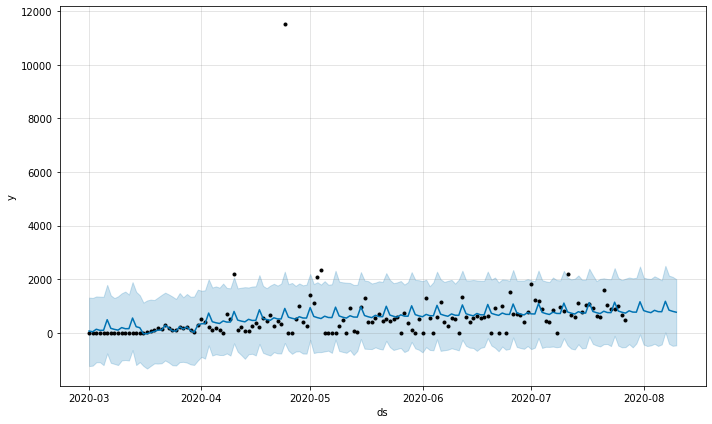

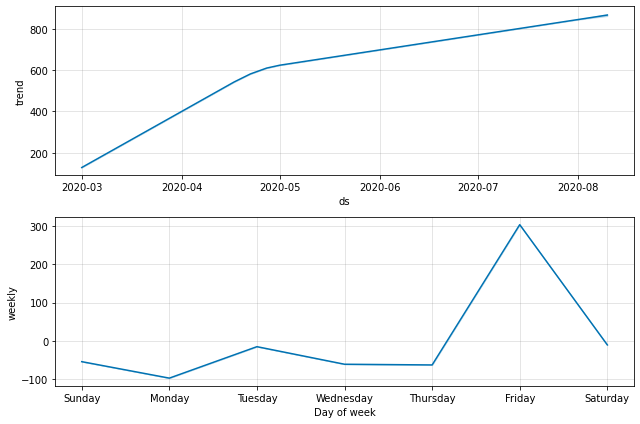

In [ ]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-16', 'lower_window': 0, 'ds_upper': '2020-03-31'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=0.01, changepoint_prior_scale = 0.1)
m2 = m2.fit(df_ec)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show

In [ ]:
#metricas
df_cv = cross_validation(m2,horizon='7 days', parallel="processes")
df_p_ec = performance_metrics(df_cv);


INFO:prophet:Making 35 forecasts with cutoffs between 2020-03-23 00:00:00 and 2020-07-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f559ab83040>
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/qmk4x66q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/32m41qk6.json
DEBUG:cmdstanpy:idx 0
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55287', 'data', 'file=/tmp/tmpcm1uu7ie/qmk4x66q.json', 'init=/tmp/tmpcm1uu7ie/32m41qk6.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_model8z5wm9zh/prophet_model-20221209202725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/9zvuuy9i.json
DEBUG:cmdstanp

###Criação do CSV

In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_ecuador.csv")

## Previsão do Mexico

###Prophet Limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/smfswuuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/1bsu6iqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4421', 'data', 'file=/tmp/tmpcm1uu7ie/smfswuuj.json', 'init=/tmp/tmpcm1uu7ie/1bsu6iqn.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelyc4w8zbn/prophet_model-20221209202751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

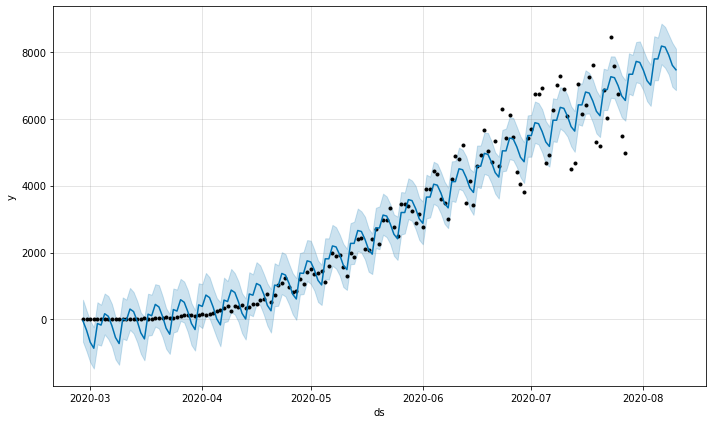

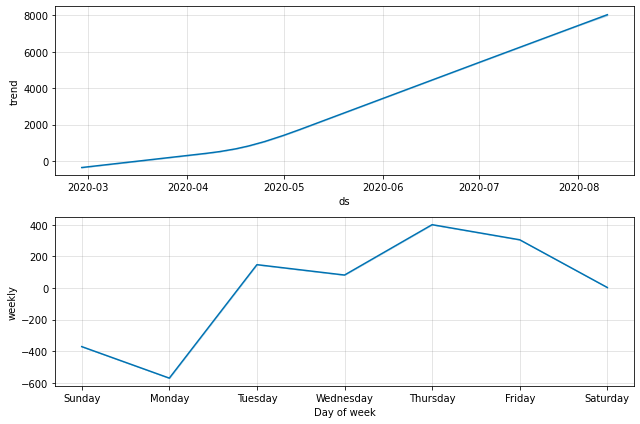

In [ ]:
pais=['Mexico']
df_me = df1[df1['Country/Region'].isin(pais)]
df_me= df_me[['ds','y']]

m = Prophet()
m.fit(df_me)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_me)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/v5xauc0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/3thrmytb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73682', 'data', 'file=/tmp/tmpcm1uu7ie/v5xauc0b.json', 'init=/tmp/tmpcm1uu7ie/3thrmytb.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modeltqm8gxbf/prophet_model-20221209202752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
20:27:52 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  1406.257386
1                     0.001                     0.10  1380.881778
2                     0.001                     1.00  1387.462353
3                     0.001                    10.00  1383.893858
4                     0.010                     0.01  1385.388104
5                     0.010                     0.10  1350.181827
6                     0.010                     1.00  1353.655061
7                     0.010                    10.00  1348.648865
8                     0.100                     0.01   906.645678
9                     0.100                     0.10   887.939560
10                    0.100                     1.00   887.226009
11                    0.100                    10.00   886.371200
12                    0.500                     0.01   947.673632
13                    0.500                     0.10   926.261172
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/cbqz3lth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/0e8ln8fq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80608', 'data', 'file=/tmp/tmpcm1uu7ie/cbqz3lth.json', 'init=/tmp/tmpcm1uu7ie/0e8ln8fq.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelzsiz0f_b/prophet_model-20221209202837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

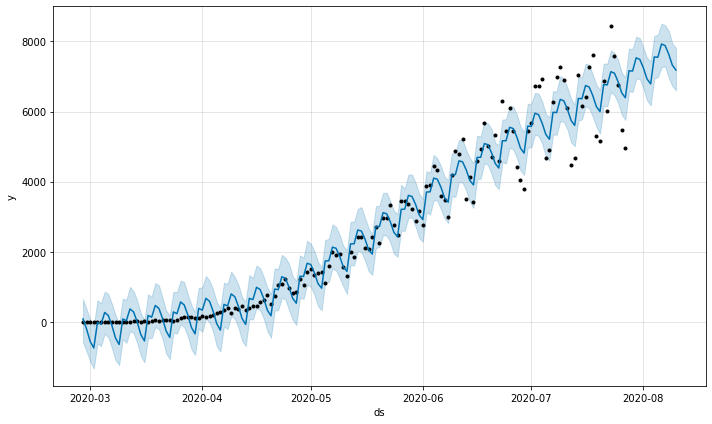

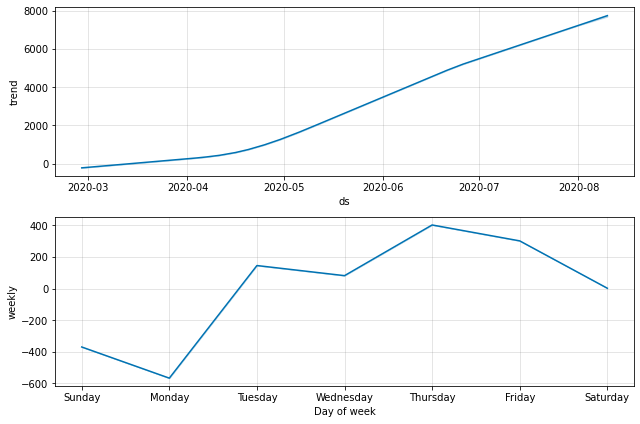

In [ ]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.1).fit(df_me)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/i7zf2x0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/69txgsvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32778', 'data', 'file=/tmp/tmpcm1uu7ie/i7zf2x0i.json', 'init=/tmp/tmpcm1uu7ie/69txgsvh.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelgztou12u/prophet_model-20221209202838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-16             0 2020-03-31            15






<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

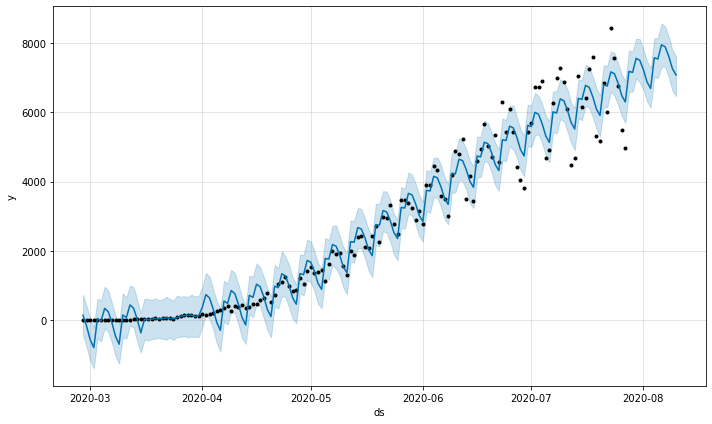

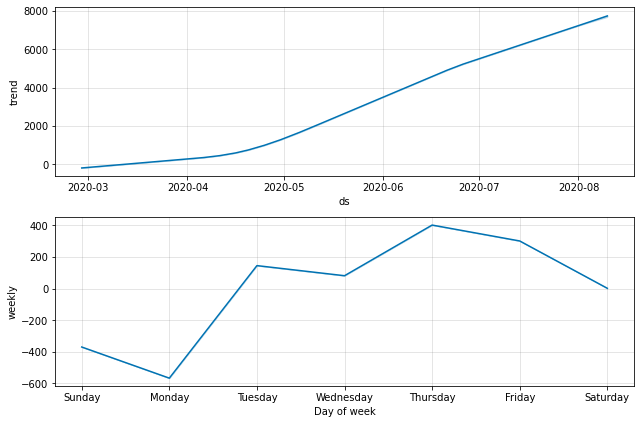

In [ ]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-16', 'lower_window': 0, 'ds_upper': '2020-03-31'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=10.0, changepoint_prior_scale = 0.1)
m2 = m2.fit(df_me)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show

In [ ]:
#metricas
df_cv = cross_validation(m2,horizon='7 days', parallel="processes")
df_p_mx = performance_metrics(df_cv);


INFO:prophet:Making 35 forecasts with cutoffs between 2020-03-23 00:00:00 and 2020-07-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f559def4340>
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/hxih8qhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/31nm66cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/_h2qmfb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcm1uu7ie/8el_8x4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87500', 'data', 'file=/tmp/tmpcm1uu7ie/hxih8qhl.json', 'init=/tmp/tmpcm1uu7ie/_h2qmfb2.json', 'output', 'file=/tmp/tmpcm1uu7ie/prophet_modelqbgzqm6d/prophet_model-20221209202840.csv', 'met

###Criação do CSV

In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_mexico.csv")

##Metricas de todos os Paises

In [ ]:
print('Metricas da Argentina')
display(df_p_ag.tail(1))
print('\n')
print('Metricas da Espanha')
display(df_p_sp.tail(1))
print('\n')
print('Metricas da Chile')
display(df_p_ch.tail(1))
print('\n')
print('Metricas da Equador')
display(df_p_ec.tail(1))
print('\n')
print('Metricas da Mexico')
display(df_p_mx.tail(1))

Metricas da Argentina


,horizon,mse,rmse,mae,mdape,smape,coverage
12,7 days,192184.10846,438.38808,299.386708,0.277716,0.513684,0.030691




Metricas da Espanha


,horizon,mse,rmse,mae,mdape,smape,coverage
12,7 days,1.672120e+09,40891.568009,19684.175633,0.835216,1.274416,0.27619




Metricas da Chile


,horizon,mse,rmse,mae,mdape,smape,coverage
12,7 days,2.936109e+06,1713.507812,1246.234609,0.287745,0.500817,0.373333




Metricas da Equador


,horizon,mse,rmse,mae,mdape,smape,coverage
12,7 days,312922.050529,559.39436,389.994542,0.659928,0.858498,0.845588




Metricas da Mexico


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
12,7 days,483169.65594,695.104061,518.559693,0.243143,0.173061,0.274511,0.098039
